<a href="https://colab.research.google.com/github/Mostafazayd97/pytorch-projects/blob/main/breat_cancer_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)


In [61]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [62]:
data.target_names
data.target.shape, data.data.shape

((569,), (569, 30))

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
N,D = X_train.shape

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)


In [66]:
import torch
import numpy as np
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [67]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [68]:
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

In [69]:
for it in range(n_epochs):
  optimizer.zero_grad()
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
  loss.backward()
  optimizer.step()

  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
  if(it+1) % 50 == 0:
    print(f"Epoch {it+1}/{n_epochs}, Train Loss: {train_losses[it]:.4f}, Test Loss: {test_losses[it]:.4f}")


Epoch 50/1000, Train Loss: 0.4862, Test Loss: 0.4668
Epoch 100/1000, Train Loss: 0.3602, Test Loss: 0.3410
Epoch 150/1000, Train Loss: 0.2905, Test Loss: 0.2729
Epoch 200/1000, Train Loss: 0.2464, Test Loss: 0.2303
Epoch 250/1000, Train Loss: 0.2159, Test Loss: 0.2010
Epoch 300/1000, Train Loss: 0.1936, Test Loss: 0.1793
Epoch 350/1000, Train Loss: 0.1766, Test Loss: 0.1626
Epoch 400/1000, Train Loss: 0.1633, Test Loss: 0.1493
Epoch 450/1000, Train Loss: 0.1524, Test Loss: 0.1384
Epoch 500/1000, Train Loss: 0.1435, Test Loss: 0.1294
Epoch 550/1000, Train Loss: 0.1360, Test Loss: 0.1217
Epoch 600/1000, Train Loss: 0.1296, Test Loss: 0.1152
Epoch 650/1000, Train Loss: 0.1241, Test Loss: 0.1096
Epoch 700/1000, Train Loss: 0.1192, Test Loss: 0.1046
Epoch 750/1000, Train Loss: 0.1149, Test Loss: 0.1003
Epoch 800/1000, Train Loss: 0.1111, Test Loss: 0.0965
Epoch 850/1000, Train Loss: 0.1076, Test Loss: 0.0931
Epoch 900/1000, Train Loss: 0.1045, Test Loss: 0.0900
Epoch 950/1000, Train Loss: 0

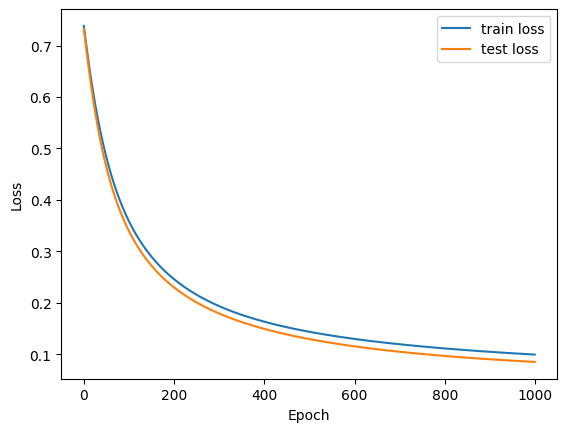

In [70]:
# prompt: plot train losses with x train and test losess and x test

import matplotlib.pyplot as plt

# Plot the train and test losses
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  train_accurecy = np.mean(p_train == y_train.numpy())
  test_accurecy = np.mean(p_test == y_test.numpy())

  print(f"Train accuracy: {train_accurecy:.4f}")
  print(f"Test accuracy: {test_accurecy:.4f}")

Train accuracy: 0.9802
Test accuracy: 0.9912
